<a href="https://colab.research.google.com/github/sylviatobing/geospatial/blob/main/geoseries_and_folium_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 93.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from IPython.display import HTML

plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
# Read in the neighborhoods geojson file
neighborhoods = gpd.read_file('neighborhoods.geojson')

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

In [4]:
# Print the head of the urban polygon
print(urban_polygon.head())

# Create a copy of the urban_polygon using EPSG:3857 and print the head
urban_poly_3857 = urban_polygon.to_crs(epsg=3857)
print(urban_poly_3857.head())

# Print the area of urban_poly_3857 in kilometers squared
area = urban_poly_3857.geometry.area / 10**6
print('The area of the Urban Residents neighborhood is ', area.values, ' km squared')

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-9660441.281 4323289.005, -966...
The area of the Urban Residents neighborhood is  [1.12898961]  km squared


<class 'geopandas.geoseries.GeoSeries'>


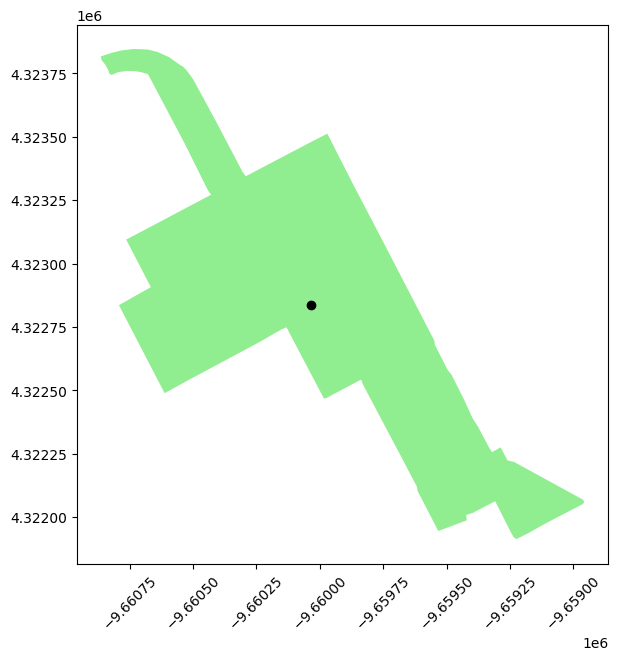

In [5]:
# Create downtown_cernter from urban_poly_3857
downtown_center = urban_poly_3857.geometry.centroid

# Print the type of downtown_center
print(type(downtown_center))

# Plot the urban_poly_3857 as ax and add the center point
ax = urban_poly_3857.plot(color='lightgreen', figsize=(7, 7));
downtown_center.plot(ax=ax, color='black');
plt.xticks(rotation=45);

In [7]:
from shapely.geometry import Point

art = gpd.read_file('public_art.csv')
art['geometry'] = art.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)
center_point = art.geometry.centroid

In [8]:
from shapely.geometry import Point

# Create art_dist_meters using art and the geometry from art
art_dist_meters = gpd.GeoDataFrame(art, geometry=art.geometry)
art_dist_meters.crs='epsg:4326'
print(art_dist_meters.head(2))

# Set the crs of art_dist_meters to use EPSG:3857
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(epsg=3857)
print(art_dist_meters.head(2))

# Add a column to art_meters, center
art_dist_meters['center'] = center_point

                             Title Last Name First Name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                            Location  Medium       Type Description  Latitude  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture              36.12856   
1  333 Commerce Street, Nashville TN          Sculpture              36.16234   

   Longitude        Mapped Location                    geometry  
0   -86.8366   (36.12856, -86.8366)  POINT (-86.83660 36.12856)  
1  -86.77774  (36.16234, -86.77774)  POINT (-86.77774 36.16234)  
                             Title Last Name First Name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                            Location  Medium       Type Description  Latitude  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture              36.12856   
1  333 Commerce Street, Nashville TN    

In [9]:
import pprint

# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters.iterrows():
    vals = row[1]
    key = vals['Title']
    ctr = vals['center']
    art_distances[key] = vals['geometry'].distance(other=ctr)

# Pretty print the art_distances
pprint.pprint(art_distances)

{'12th & Porter Mural': 10583948.500651473,
 'A Splash of Color': 10585357.16017826,
 'A Story of Nashville': 10583565.969078569,
 'Aerial Innovations Mural': 10579929.255218184,
 'Airport Sun Project': 10570311.412935875,
 'Andrew Jackson': 10583951.468665037,
 'Angel': 10588435.041707948,
 'Anticipation': 10583698.952539692,
 'April Baby': 10586916.00892881,
 'Arial Triangle [from the Gravity Series]': 10583398.524837973,
 'Ariel': 10585905.336208295,
 'Athena Parthenos': 10586065.827814262,
 'Benedictio': 10577769.979416678,
 'Bicycle Bus-Green Fleet': 10582635.68286198,
 'Blowing Bubbles': 10588435.041707948,
 'Breaking Bread': 10582634.392548595,
 'Building a Positive Community': 10582136.29114304,
 'Can-Do': 10582120.049094511,
 'Chet Atkins': 10583602.67968694,
 "Children's Chairs For The Seasons": 10583565.969078569,
 'Confederate Memorial': 10577769.979416678,
 'Confederate Private Monument': 10585868.029575413,
 'Confluence': 10585513.082652403,
 'Cool Fences': 10579074.34680

In [10]:
urban_polygon.crs = 'epsg:4326'

In [11]:
urban_polygon.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# Print the head of the urban_polygon
print(urban_polygon.head())

# Create urban_center from the urban_polygon center
urban_center = urban_polygon.to_crs(epsg=4326).centroid

# Print urban_center
print(urban_center)

# Create array for folium called urban_location
urban_location = [urban_center.y, urban_center.x]

# Print urban_location
print(urban_location)

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
41    POINT (-86.77756 36.16128)
dtype: geometry
[41    36.161278
dtype: float64, 41   -86.777565
dtype: float64]


<ipython-input-12-da9aba9df734>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  urban_center = urban_polygon.to_crs(epsg=4326).centroid


In [14]:
import folium

# Construct a folium map with urban_location
downtown_map = folium.Map(location=urban_location, zoom_start=15, width=500, height=500)

# Display the map
downtown_map.save('downtown_map.html')

downtown_map